In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [13]:

!pip install pandas==1.4.3
!pip install numpy==1.23.1
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

ERROR: Could not find a version that satisfies the requirement python==3.10.8 (from versions: none)
ERROR: No matching distribution found for python==3.10.8


In [15]:
print(np.__version__)

1.23.1


## READ CSV FIRST

In [ ]:
df = pd.read_csv('/Users/mahmooooodie/Desktop/Machine Learning/Advertising.csv')

In [17]:
 df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
# df.drop("Unnamed: 0", inplace =True, axis=1)

independent variable = feature = estimator = attribute = input

dependent variabe = target = label = output
#### features = TV, Radio, Newspaper
#### target = Sales

## Rows = Observation, Sample

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.sample(5)

,TV,radio,newspaper,sales
144,96.2,14.8,38.9,11.4
171,164.5,20.9,47.4,14.5
15,195.4,47.7,52.9,22.4
190,39.5,41.1,5.8,10.8
61,261.3,42.7,54.7,24.2


In [24]:
df.sample(frac = 0.5) #returns random 50% of entiree dataframe

,TV,radio,newspaper,sales
111,241.7,38.0,23.2,21.8
126,7.8,38.9,50.6,6.6
183,287.6,43.0,71.8,26.2
161,85.7,35.8,49.3,13.3
26,142.9,29.3,12.6,15.0
...,...,...,...,...
197,177.0,9.3,6.4,12.8
9,199.8,2.6,21.2,10.6
16,67.8,36.6,114.0,12.5
87,110.7,40.6,63.2,16.0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [26]:
  df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


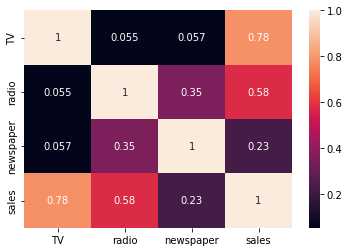

In [28]:
sns.heatmap(df.corr(), annot = True)
plt.show;

## Creating a new feature so we are feature engineering

In [29]:
df['total_spending'] = df.TV + df.radio +df.newspaper
df

,TV,radio,newspaper,sales,total_spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [32]:
df = df.iloc[:, [0,1,2,4,3]] #changing location of columns, 3 with 4 index columns
df

,TV,radio,newspaper,total_spending,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


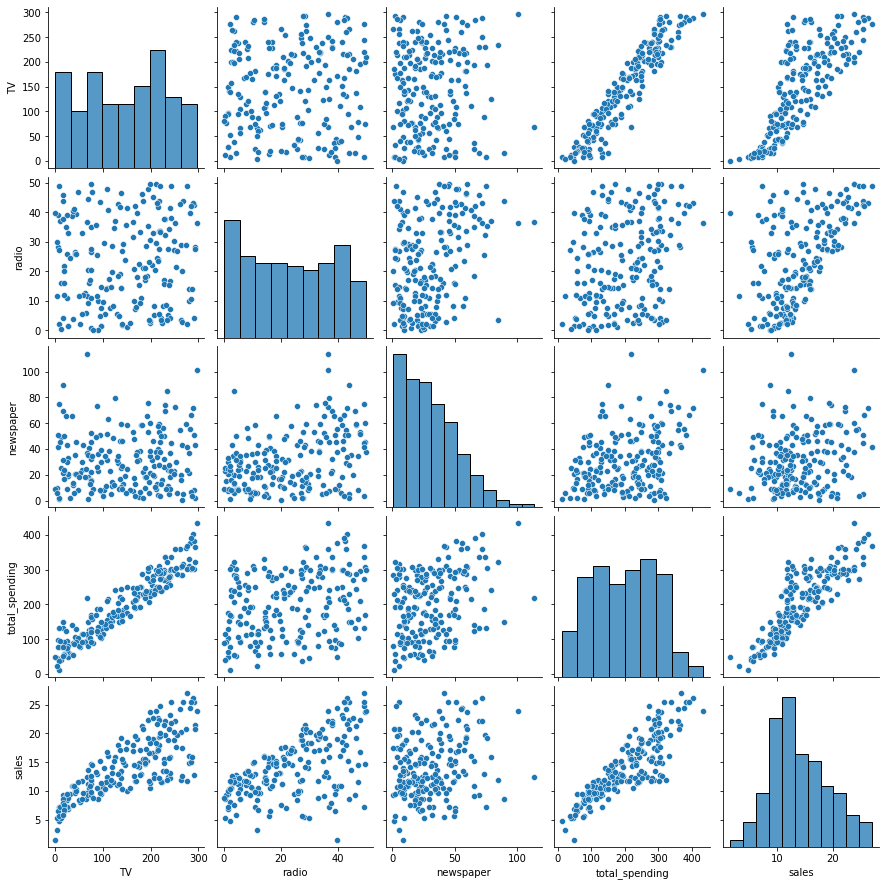

In [33]:
sns.pairplot(df);

## Which feature is most suitable for linear regression

In [34]:
import scipy.stats as stats

In [37]:
for i in df.drop(columns = "sales"): #sales feature corr with other features
    print(f"corr between sales and {i:<15}: {df.sales.corr(df[i])}")

corr between sales and TV             : 0.7822244248616066
corr between sales and radio          : 0.5762225745710551
corr between sales and newspaper      : 0.22829902637616545
corr between sales and total_spending : 0.8677123027017423


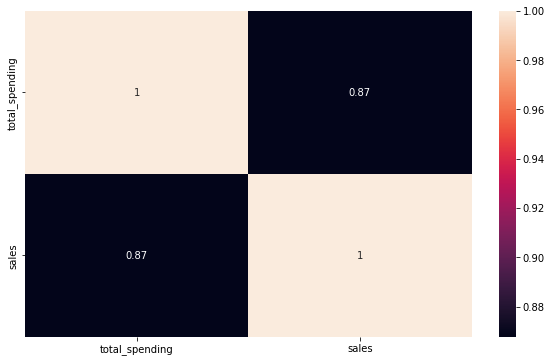

In [44]:
sns.heatmap(df.corr(), annot = True);

In [40]:
df = df[['total_spending', 'sales']] 

In [41]:
df.head()

,total_spending,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


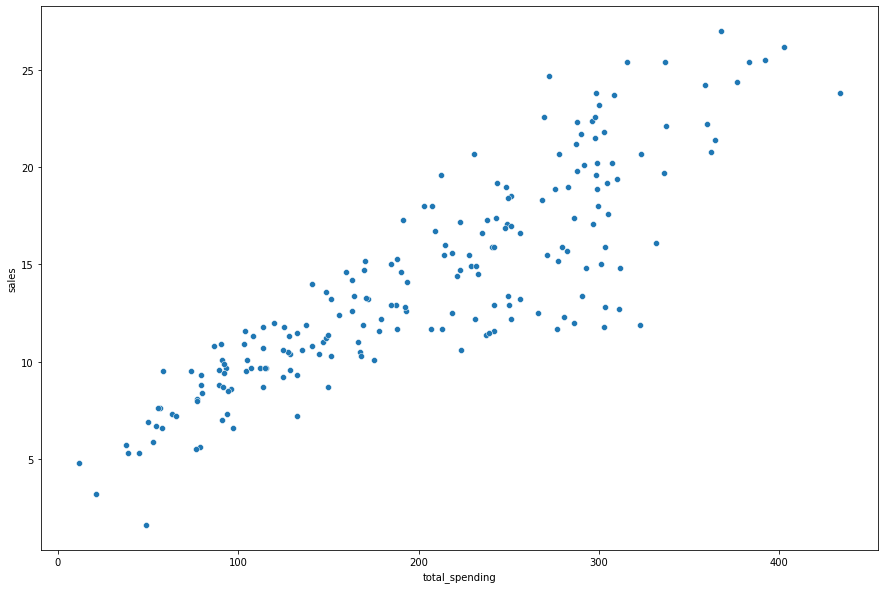

In [46]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(x = 'total_spending', y = 'sales', data = df);

## Correlation between independent and dependent variable

In [47]:
corr = df.sales.corr(df.total_spending)
corr

0.8677123027017423

 ## Coefficient of Determination R^2

In [48]:
R2_score = corr**2
R2_score

0.75292464025996

## Linear Regression

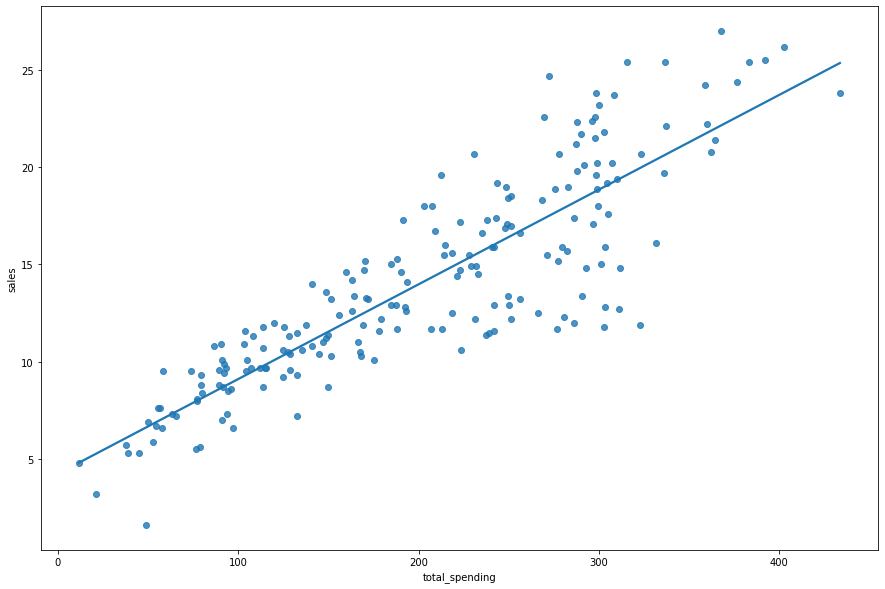

In [49]:
# LSE and Line of Best Fit
sns.regplot(x = 'total_spending', y = 'sales', data = df, ci = None);

## Splitting the dataset into X(independent) and y(dependent)

In [50]:
X = df['total_spending'] # feature
y = df['sales']          # target

In [51]:
np.polyfit(X, y, deg=1)


# index 0 of result is b1 which is the slope
# index 1 of result is b0 which is the intercept

array([0.04868788, 4.24302822])

In [52]:
slope, intercept = np.polyfit(X, y, deg=1)

In [53]:
print("slope     : ", slope)
print("intercept : ", intercept)

slope     :  0.04868787931904817
intercept :  4.243028216036327


In [54]:
# identifying the y_pred

y_pred = slope*X + intercept

In [55]:
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spending, Length: 200, dtype: float64

actual = y

predicted = y_pred

residual = y - y_pred

LSE = (y - y_pred)^2

In [56]:
residual = y - y_pred
residual


0      1.444288
1     -0.118896
2     -1.389303
3      2.021708
4     -3.514998
         ...   
195    0.645057
196    0.237631
197   -0.825183
198    2.181061
199   -2.985785
Length: 200, dtype: float64

In [57]:
LSE = residual**2

In [58]:
LSE

0       2.085967
1       0.014136
2       1.930164
3       4.087302
4      12.355211
         ...    
195     0.416098
196     0.056469
197     0.680926
198     4.757026
199     8.914914
Length: 200, dtype: float64

In [59]:
values = {'actual': y, 'prediction': y_pred, 'residual': y - y_pred, 'LSE': (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,prediction,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [63]:
 df_2.residual.sum().round()

-0.0

In [65]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with Simple Linear Regression

In [66]:
# X = potential spending
# y_pred = b1X +b0

potential_spend = np.linspace(0,500,100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [67]:
# this is the simple linear regression to find

predicted_sales_lin = slope * potential_spend + intercept
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

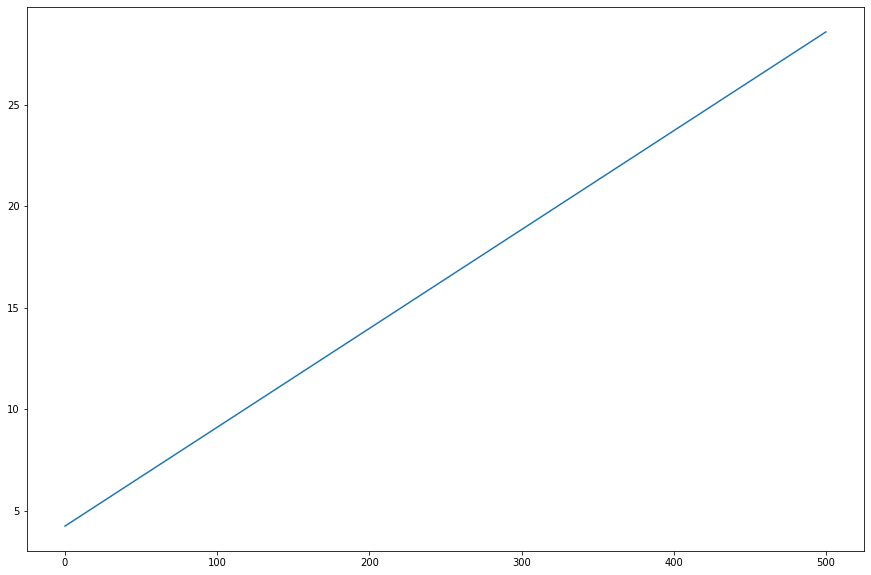

In [69]:
plt.plot(potential_spend, predicted_sales_lin);

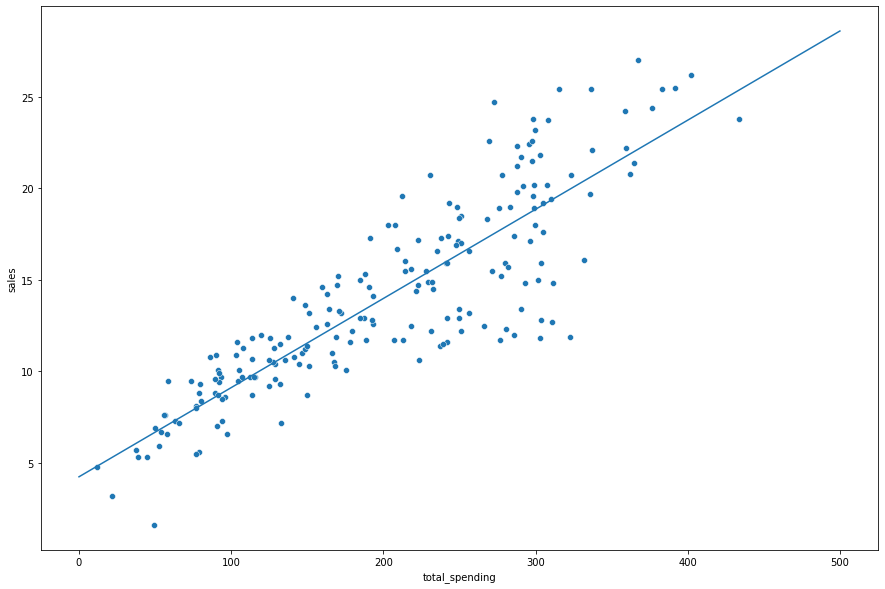

In [72]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x = 'total_spending', y = 'sales', data = df);

## How can we improve predictions?

In [74]:
a = np.polyfit(X, y, deg = 3)
a

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [80]:
a1 = a[0]
a2 = a[1]
a3 = a[2]
a0 = a[3]


In [81]:
# polynomial regressions predictions

predicted_sales_poly = a1 * potential_spend**3 + a2 * potential_spend**2 + a3 * potential_spend + a0
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

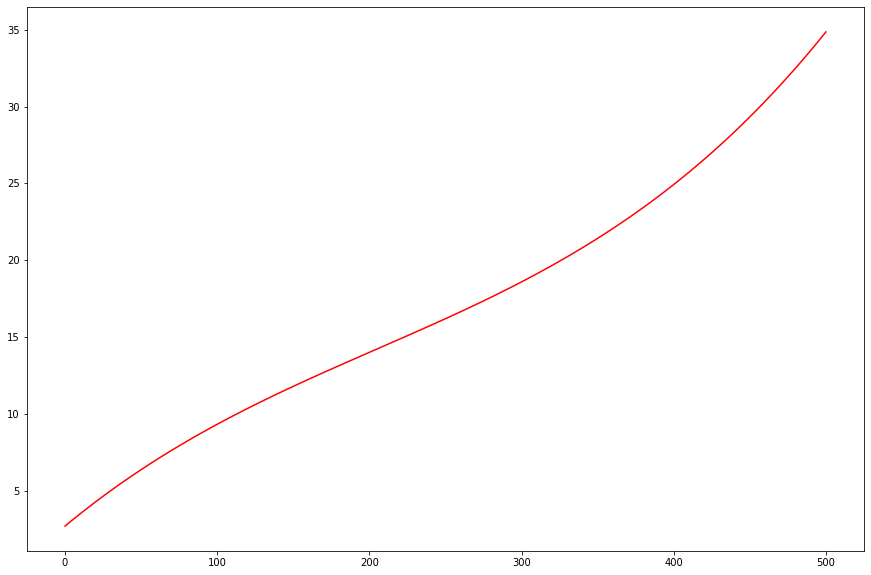

In [84]:
plt.plot(potential_spend, predicted_sales_poly, color = 'red');

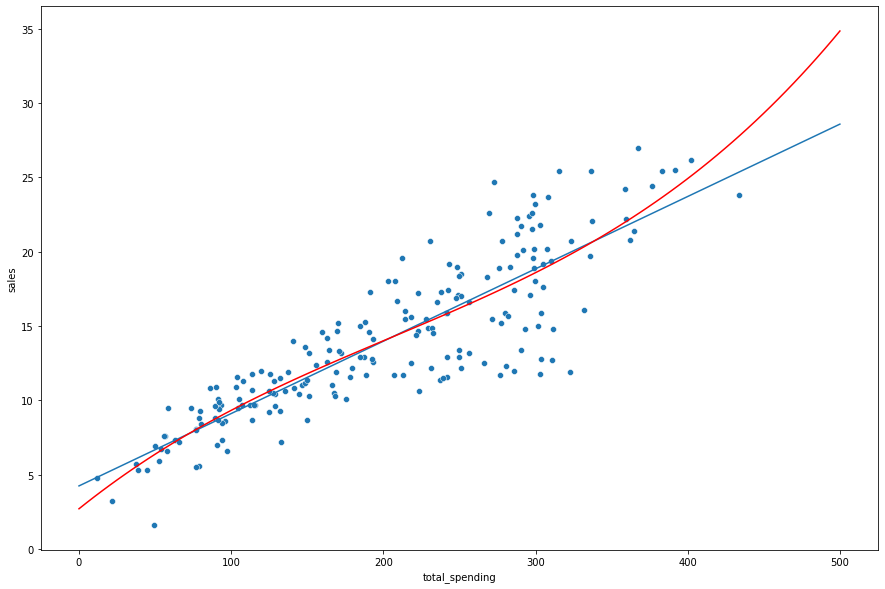

In [87]:
plt.plot(potential_spend, predicted_sales_lin)
plt.plot(potential_spend, predicted_sales_poly, color = "red")
sns.scatterplot(x ="total_spending", y = "sales", data = df);

In [89]:
spend = 400
sales_pred_lin = slope*spend + intercept
sales_pred_poly = a1*spend**3 + a2*spend**2 + a3*spend +a4

print(sales_pred_lin,sales_pred_poly)

23.7181799436556 24.924972837670698
